# Test Notebook

In [1]:
from amuse.units import units, constants
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.couple import bridge
from amuse.community.huayno import Huayno
from amuse.lab import new_salpeter_mass_distribution, new_plummer_model

%matplotlib inline
import numpy
from matplotlib import pyplot

/opt/homebrew/Caskroom/miniforge/base/envs/amuse_p313/lib/python3.13/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
from galaxy_basicMW import MilkyWay_galaxy
from functions import *
MWG = MilkyWay_galaxy()

3.0 Myr
Simulation finished, cleaning up.


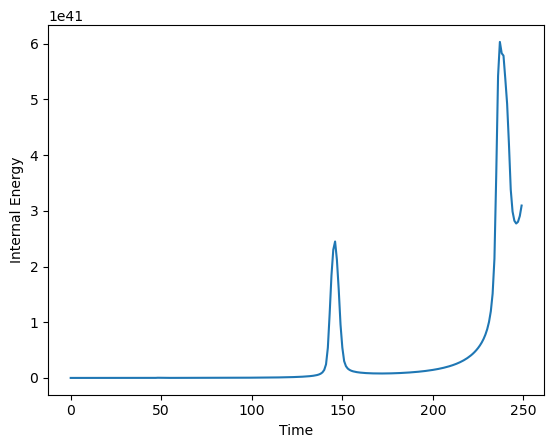

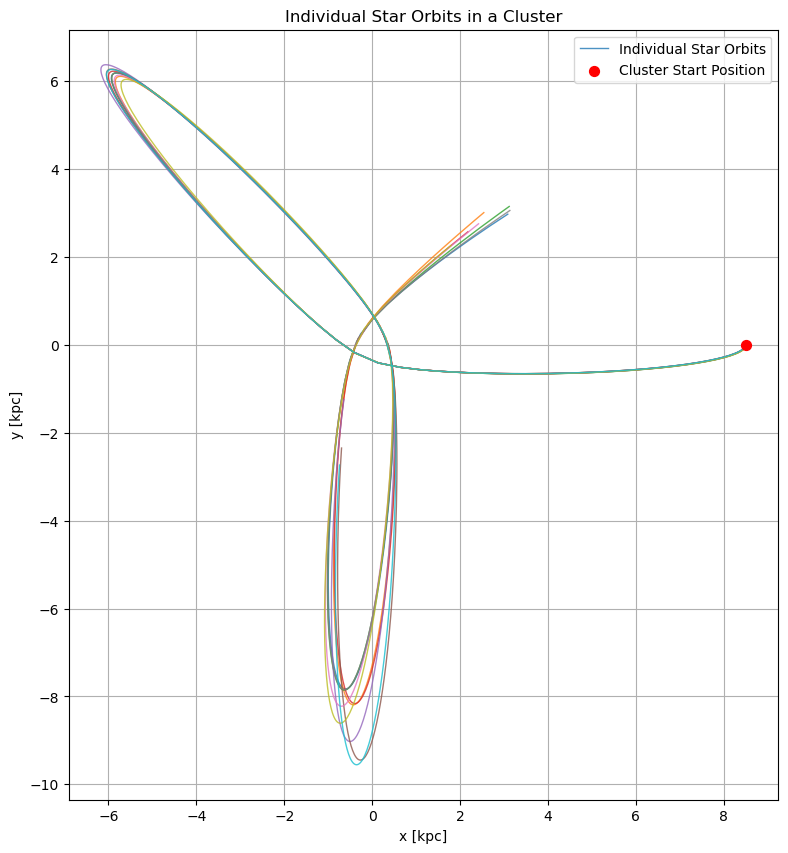

In [3]:
N_stars = 10
plummer_radius = 10
initial_pos = [8.5,0,0] | units.kpc
initial_vel = [0,-22,0] | units.kms
cluster = make_cluster_plummer(N_stars, plummer_radius)
cluster2 = cluster.copy()
out = setup(MWG, cluster2, vel=initial_vel, N_stars=N_stars, pos=initial_pos)
traj = run(*out)
plot(traj, N_stars, initial_pos)

3.0 Myr
Simulation finished, cleaning up.


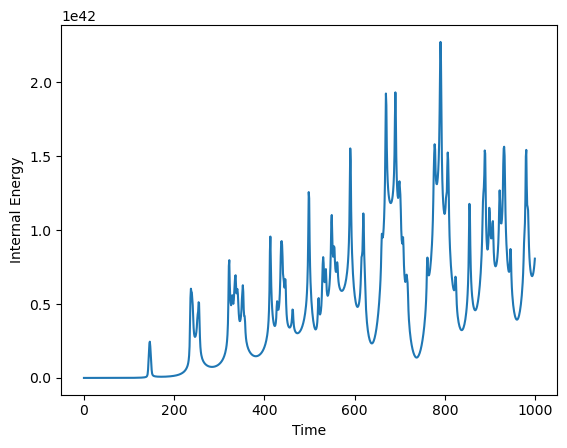

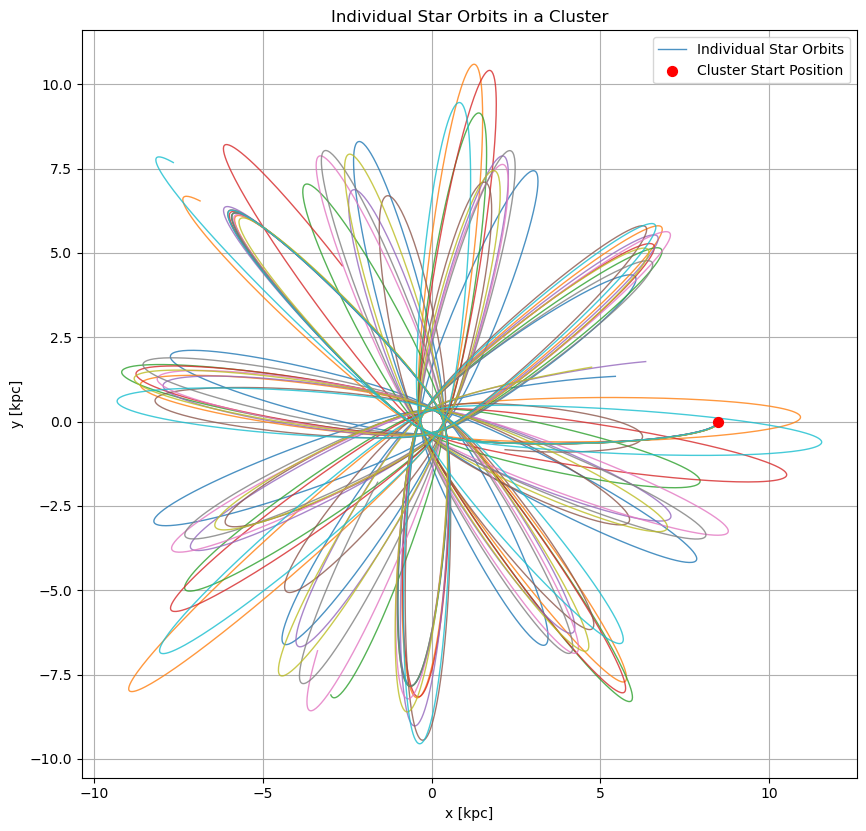

In [4]:
cluster3 = cluster.copy()
out = setup(MWG, cluster3, vel=initial_vel, N_stars=N_stars, pos=initial_pos)
traj = run(*out, length=1000)
plot(traj, N_stars, initial_pos)

2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.
2.0 Myr
Simulation finished, cleaning up.


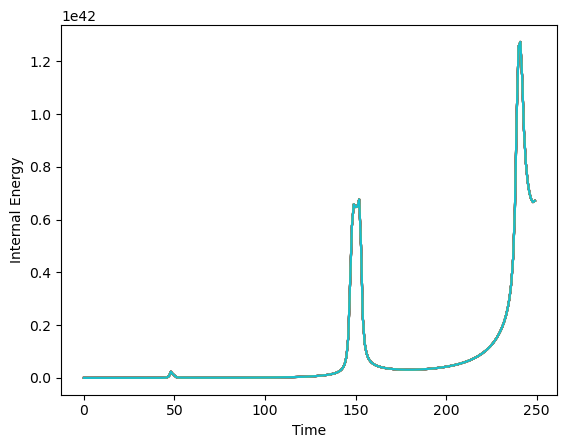

In [5]:
initial_vels = numpy.arange(22., 441, 22) | units.kms
N_stars = 10
plummer_radius = 10
initial_pos = [8.5,0,0] | units.kpc
initial_vel = [0,-22,0] | units.kms
cluster = make_cluster_plummer(N_stars, plummer_radius)
for vel in initial_vels:
    cluster2 = cluster.copy()
    out = setup(MWG, cluster2, vel=initial_vel, N_stars=N_stars, pos=initial_pos)
    traj = run(*out)
    #plot(traj, N_stars, initial_pos)


Running simulation for initial velocity: 22 kms...
Running simulation for initial velocity: 44 kms...
Running simulation for initial velocity: 66 kms...
Running simulation for initial velocity: 88 kms...
Running simulation for initial velocity: 110 kms...
Running simulation for initial velocity: 132 kms...
Running simulation for initial velocity: 154 kms...
Running simulation for initial velocity: 176 kms...
Running simulation for initial velocity: 198 kms...
Running simulation for initial velocity: 220 kms...
Running simulation for initial velocity: 242 kms...
Running simulation for initial velocity: 264 kms...
Running simulation for initial velocity: 286 kms...
Running simulation for initial velocity: 308 kms...
Running simulation for initial velocity: 330 kms...
Running simulation for initial velocity: 352 kms...
Running simulation for initial velocity: 374 kms...
Running simulation for initial velocity: 396 kms...
Running simulation for initial velocity: 418 kms...
Running simulati

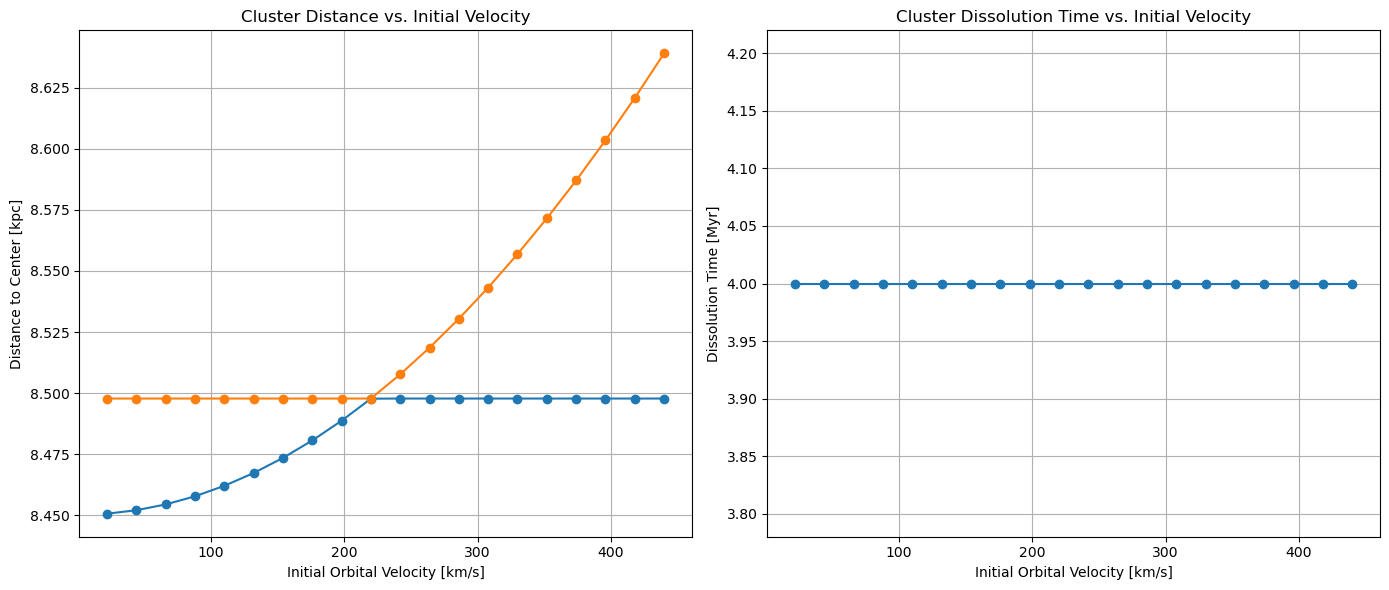

In [8]:
# --- All previous setup code should be loaded ---
# (Imports, MilkyWay_galaxy class, MWG object, etc.)

import numpy
from matplotlib import pyplot
from amuse.lab import new_salpeter_mass_distribution, new_plummer_model
from amuse.units import units, constants
from amuse.lab import nbody_system
from amuse.community.huayno import Huayno
from amuse.couple import bridge

# This class should be defined from the previous cells
class MilkyWay_galaxy(object):
    def __init__(
        self,
        Mb=1.40592e10 | units.MSun,
        Md=8.5608e10 | units.MSun,
        Mh=1.07068e11 | units.MSun,
    ):
        self.Mb = Mb
        self.Md = Md
        self.Mh = Mh

    def get_potential_at_point(self,eps,x,y,z):
        r = (x**2+y**2+z**2)**0.5
        R = (x**2+y**2)**0.5
        b1 = 0.3873 | units.kpc
        pot_bulge = -constants.G*self.Mb/(r**2+b1**2)**0.5
        a2 = 5.31 | units.kpc
        b2 = 0.25 | units.kpc
        pot_disk = -constants.G*self.Md/(R**2 + (a2+ (z**2+ b2**2)**0.5 )**2 )**0.5
        a3 = 12.0 | units.kpc
        cut_off = 100 | units.kpc
        d1= r/a3
        c = 1+ (cut_off/a3)**1.02
        pot_halo = (
            -constants.G * (self.Mh/a3) * d1**1.02/(1+ d1**1.02)
            -(constants.G*self.Mh/(1.02*a3))
            * (
                -1.02 / c + numpy.log(c) + 1.02/(1+d1**1.02)
                - numpy.log(1.0 + d1**1.02)
            )
        )
        return 2*(pot_bulge+pot_disk+ pot_halo)

    def get_gravity_at_point(self, eps, x,y,z):
        r = (x**2+y**2+z**2)**0.5
        R = (x**2+y**2)**0.5
        b1 = 0.3873 | units.kpc
        force_bulge = -constants.G*self.Mb/(r**2+b1**2)**1.5
        a2 = 5.31 | units.kpc
        b2 = 0.25 | units.kpc
        d = a2+ (z**2+ b2**2)**0.5
        force_disk = -constants.G*self.Md/(R**2+ d**2 )**1.5
        a3 = 12.0 | units.kpc
        d1 = r/a3
        force_halo = -constants.G*self.Mh*d1**0.02/(a3**2*(1+d1**1.02))
        ax = force_bulge*x + force_disk*x + force_halo*x/r
        ay = force_bulge*y + force_disk*y + force_halo*y/r
        az = force_bulge*z + force_disk*d*z/(z**2 + b2**2)**0.5 + force_halo*z/r
        return ax,ay,az

# Ensure the MilkyWay_galaxy object is instantiated
MWG = MilkyWay_galaxy()

# --- Assignment 4 Solution Starts Here ---

# 1. Generate the master cluster ONCE
N_stars = 10
plummer_radius = 10 | units.pc
masses = new_salpeter_mass_distribution(N_stars, mass_min=1|units.MSun, mass_max=100|units.MSun)
converter_plummer = nbody_system.nbody_to_si(masses.sum(), plummer_radius)
# This is our template cluster, with its center at (0,0,0)
original_cluster = new_plummer_model(N_stars, convert_nbody=converter_plummer)
original_cluster.mass = masses

# 2. Define simulation parameters and lists to store results
initial_velocities = numpy.arange(22, 441, 22) | units.kms
cluster_start_pos = [8.5, 0, 0] | units.kpc
max_sim_time = 500 | units.Myr
time_step = 1 | units.Myr
times = numpy.arange(0., max_sim_time.value_in(units.Myr) + time_step.value_in(units.Myr), time_step.value_in(units.Myr)) | units.Myr

pericenter_distances = [] | units.kpc
apocenter_distances = [] | units.kpc
dissolution_times = [] | units.Myr

# 3. Main loop over each initial velocity
for vel in initial_velocities:
    print(f"Running simulation for initial velocity: {vel}...")

    # IMPORTANT: Make a fresh copy of the cluster for this run
    cluster = original_cluster.copy()

    # Move the cluster to its starting orbital position and give it its orbital velocity
    cluster.position += cluster_start_pos
    cluster.velocity += [0, vel.value_in(units.kms), 0] | units.kms

    # Set up the AMUSE simulation for this specific run
    converter_sim = nbody_system.nbody_to_si(cluster.mass.sum(), cluster_start_pos.length())
    gravity_code = Huayno(converter_sim)
    gravity_code.particles.add_particles(cluster)
    channel = gravity_code.particles.new_channel_to(cluster)

    gravity_bridge = bridge.Bridge(use_threading=False)
    gravity_bridge.add_system(gravity_code, (MWG,))
    gravity_bridge.timestep = 0.5 | units.Myr

    # Variables to track for this specific run
    min_distance_run = float('inf') | units.kpc
    max_distance_run = 0. | units.kpc
    dissolution_time_run = max_sim_time # Default if it stays bound
    is_unbound = False

    # Inner loop for the time evolution of this one simulation
    for time in times:
        gravity_bridge.evolve_model(time)
        channel.copy()

        # Calculate distance to Galactic center and update pericenter
        com_pos = cluster.center_of_mass()
        distance = com_pos.length()
        if distance < min_distance_run:
            min_distance_run = distance

        if distance > max_distance_run:
            max_distance_run = distance

        # Check if the cluster has become unbound
        if not is_unbound:
            # To get internal energy, we must work in the center-of-mass frame
            internal_cluster_state = cluster.copy()
            internal_cluster_state.position -= cluster.center_of_mass()
            internal_cluster_state.velocity -= cluster.center_of_mass_velocity()

            potential_energy = internal_cluster_state.potential_energy()
            kinetic_energy = internal_cluster_state.kinetic_energy()
            total_internal_energy = potential_energy + kinetic_energy

            # If total energy is positive, the system is no longer bound
            if total_internal_energy > (0 | units.J):
                dissolution_time_run = time
                is_unbound = True
                # **** THE CRITICAL FIX: Stop this run once unbound ****
                break

    # Clean up the code for this run
    gravity_bridge.stop()

    # Store the results from this run
    pericenter_distances.append(min_distance_run)
    apocenter_distances.append(max_distance_run)
    dissolution_times.append(dissolution_time_run)

# 4. Plot the final results
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distance of closest approach vs. initial velocity
ax1.plot(initial_velocities.value_in(units.kms), pericenter_distances.value_in(units.kpc), 'o-', label="Pericenter (Closest Approach)")
ax1.plot(initial_velocities.value_in(units.kms), apocenter_distances.value_in(units.kpc), 'o-', label="Apocenter (Furthest Distance)")
ax1.set_xlabel("Initial Orbital Velocity [km/s]")
ax1.set_ylabel("Distance to Center [kpc]")
ax1.set_title("Cluster Distance vs. Initial Velocity")
ax1.grid(True)

# Plot 2: Dissolution time vs. initial velocity
ax2.plot(initial_velocities.value_in(units.kms), dissolution_times.value_in(units.Myr), 'o-')
ax2.set_xlabel("Initial Orbital Velocity [km/s]")
ax2.set_ylabel("Dissolution Time [Myr]")
ax2.set_title("Cluster Dissolution Time vs. Initial Velocity")
ax2.grid(True)

pyplot.tight_layout()
pyplot.show()